In [191]:
from brian2 import *

In [192]:
%matplotlib inline

In [193]:
#All models are defined by systems of differential equations. 
#Example 1:

In [194]:
tau = 10*ms #unit system supported
eqs = '''
dv/dt = (1-v)/tau : 1 
'''
# ": 1" defines the unit of the variable defined by the equation, i.e. v here. 

In [195]:
#Creating a neuron with the Brian class NeuronGroup(n, eqs) where n = #neurons
G = NeuronGroup(1, eqs)

In [196]:
#One should always define dimensionally consistent equations.
#Otherwise a DimensionMismatchError will be raised.

In [197]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs)
run(100*ms)

WARNING    The object 'neurongroup_3' is getting deleted, but was never included in a network. This probably means that you did not store the object reference in a variable, or that the variable was not used to construct the network.
The object was created here (most recent call only):
  File '/var/folders/24/mnw4wdg9203307_4bqpv_5gc0000gn/T/ipykernel_42547/1041003537.py', line 2, in <module>
    G = NeuronGroup(1, eqs) [brian2.core.base.unused_brian_object]


In [198]:
start_scope()

G = NeuronGroup(1, eqs, method='exact') #avoids the num int message
print('Before v = %s' % G.v[0])
run(100*ms)
print('After v = %s' % G.v[0])

Before v = 0.0
After v = 0.9999546000702376


In [199]:
print('Expected value of v = %s' % (1-exp(-100*ms/tau)))

Expected value of v = 0.9999546000702375


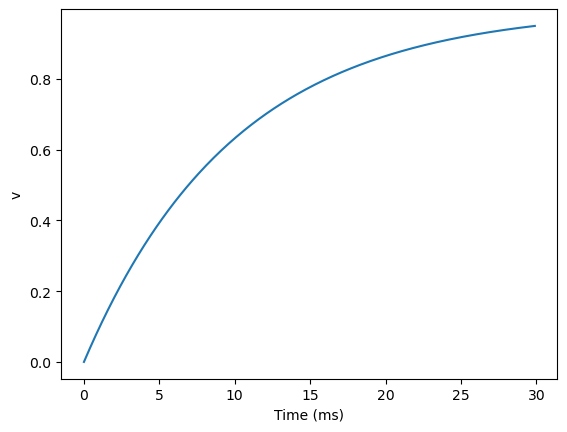

In [200]:
start_scope()

#Graph over how the variable v evolves over time

G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=True)

run(30*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

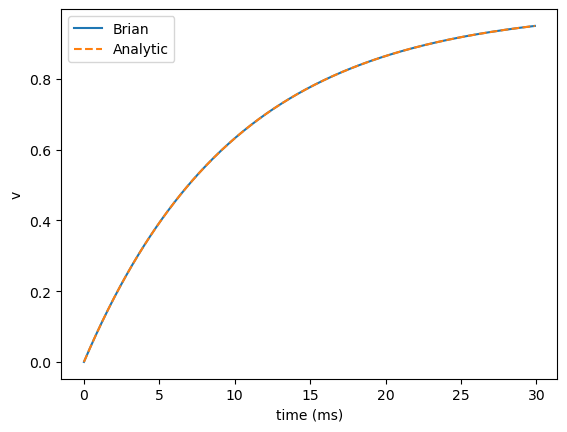

In [201]:
start_scope()

#Now let's compare the behaviour of v with the expected behaviour..

G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=0)

run(30*ms)

plot(M.t/ms, M.v[0], 'C0', label='Brian')
plot(M.t/ms, 1-exp(-M.t/tau), 'C1--', label='Analytic')
xlabel('time (ms)')
ylabel('v')
legend();

In [202]:
#Object StateMonitor is used to record the values of a neuron variable while the simulation runs. 
#1st arg is group to record from.
#2nd arg is variable to record from.
#record=0 means that we record all values for neuron 0. Takes up too much RAM to record for 
#all neurons in large simulations.

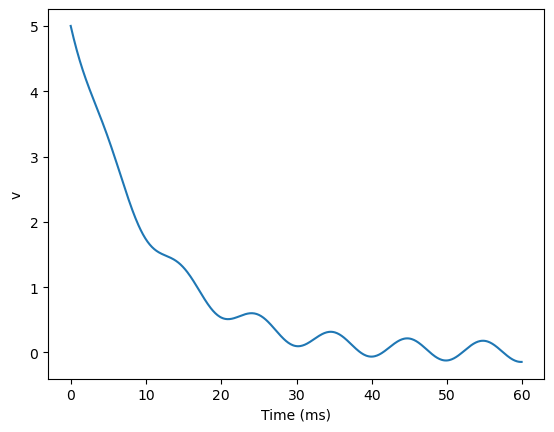

In [203]:
start_scope()

#Now lets change the equation and modify parameters. Exact integration does not work here so we
#change to Euler method.

tau = 10*ms
eqs = '''
dv/dt = (sin(2*pi*100*Hz*t)-v)/tau : 1
'''

# Change to Euler method because exact integrator doesn't work here
G = NeuronGroup(1, eqs, method='euler')
M = StateMonitor(G, 'v', record=0)

G.v = 5 # initial value

run(60*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

## Spikes

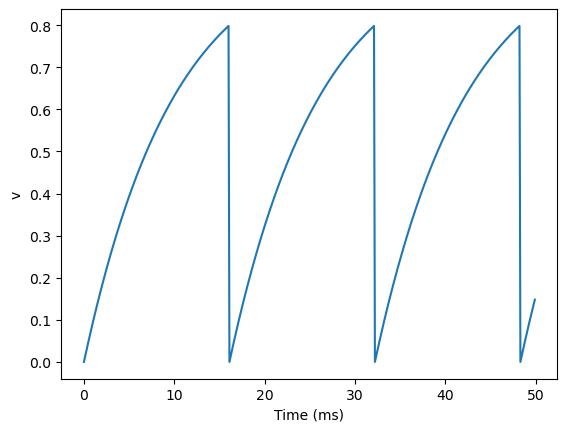

In [204]:
start_scope

# Now, let's start using some spiking behavior.

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''
# When v > 0.8 a spike is fired (and registered by Brian.
# It is then imeditately reset to v = 0.

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

M = StateMonitor(G, 'v', record=0)
run(50*ms)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

In [205]:
#why the error before?

In [206]:
start_scope()

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

spikemon = SpikeMonitor(G) #Stores the spike times in var t.

run(50*ms)

print('Spike times: %s' % spikemon.t[:])

Spike times: [16.  32.1 48.2] ms


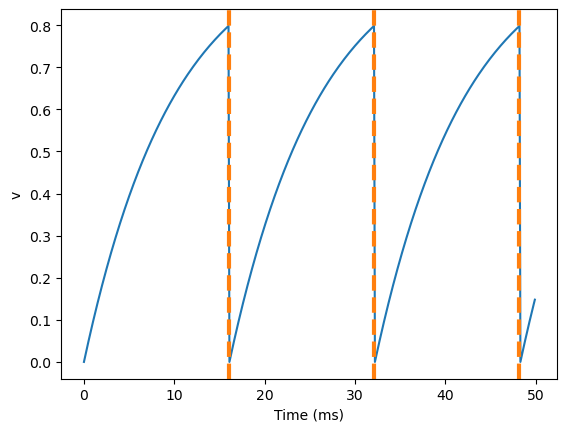

In [207]:
start_scope

#Now let's plot these spikes times on the graph.

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3) #the orange dashed line.
xlabel('Time (ms)')
ylabel('v');

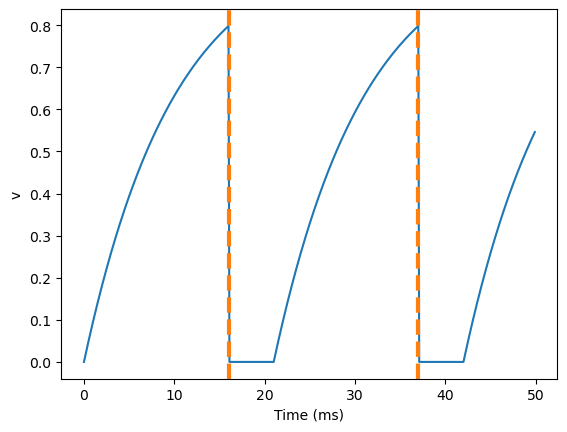

In [208]:
start_scope()

#Now we are adding refractoriness. This means that after a spike is fired the neuron
#cannot fire another spike for a certain amount of time. 
#To do this we add two things:
# (1): We add the argument refractory to the NeuronGroup decl.
# (2): We also add (unless refractory) to the definition of v in the diff eq. Important!
# This means that the diff eq determines the behaviour of v unless v is refractory.

# Note that you can do more complicated and interesting things with refractoriness. 
# See the full documentation for more details about how it works.

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1 (unless refractory)
'''

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', refractory=5*ms, method='exact')

statemon = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

run(50*ms)

plot(statemon.t/ms, statemon.v[0])
for t in spikemon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
xlabel('Time (ms)')
ylabel('v');

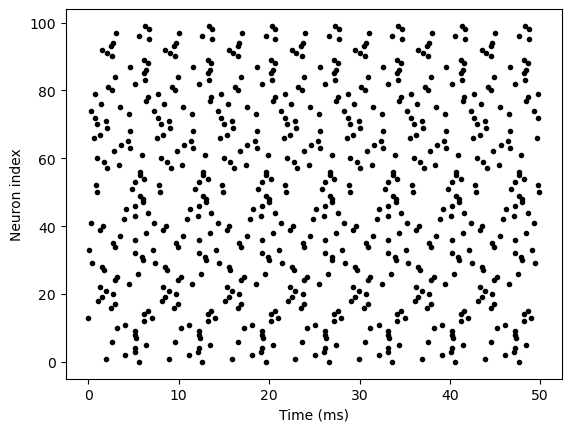

In [209]:
start_scope()

# Now let's start working with multiple neurons

N = 100 #nbr of neurons
tau = 10*ms
eqs = '''
dv/dt = (2-v)/tau : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact')
G.v = 'rand()' #initializes each neuron w. a diff uniform random val between 0-1. 

spikemon = SpikeMonitor(G)

run(50*ms)

plot(spikemon.t/ms, spikemon.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index');

# We have a new variable N determining the number of neurons.
# G.v = 'rand()' : initializes each neuron with different uniform random numbers
# between 0 and 1. 

# spikemon.t gives the times of all the spikes,
# spikemon.i gives the corresponding neuron index for each spike,

# Raster plot: plots single black dot with time on the x-axis and neuron index on the y-value. 

## Parameters

Using per-neuron parameters that do not have a differential equation attached to them. 

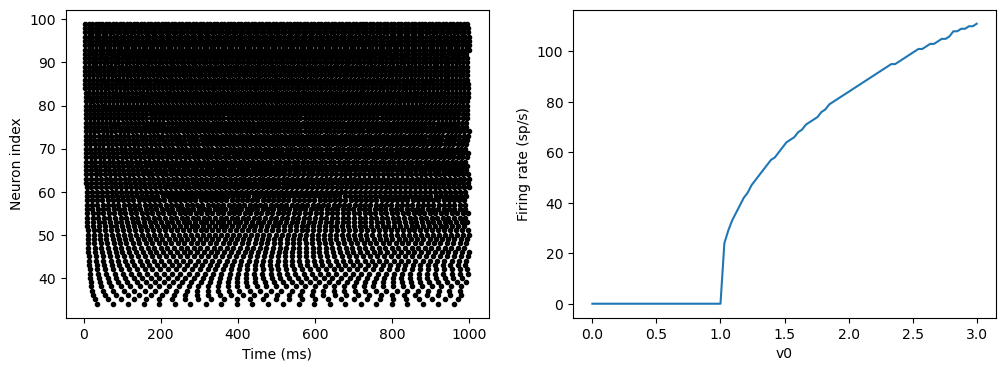

In [212]:
start_scope()

N = 100 #try 50 also
tau = 10*ms
v0_max = 3.
duration = 1000*ms

eqs = '''
dv/dt = (v0-v)/tau : 1 (unless refractory)
v0 : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='exact')
M = SpikeMonitor(G)

G.v0 = 'i*v0_max/(N-1)'

run(duration)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')
ylabel('Firing rate (sp/s)');

The line v0 : 1 declares a new per-neuron parameter v0 with units 1 (i.e. dimensionless).

The line G.v0 = 'i*v0_max/(N-1)' initialises the value of v0 for each neuron varying from 0 up to v0_max. The symbol i when it appears in strings like this refers to the neuron index.

So in this example, we're driving the neuron towards the value v0 exponentially, but when v crosses v>1, it fires a spike and resets. The effect is that the rate at which it fires spikes will be related to the value of v0. For v0<1 it will never fire a spike, and as v0 gets larger it will fire spikes at a higher rate. The right hand plot shows the firing rate as a function of the value of v0. This is the I-f curve of this neuron model.

Note that in the plot we've used the count variable of the SpikeMonitor: this is an array of the number of spikes each neuron in the group fired. Dividing this by the duration of the run gives the firing rate.

## Stochastic neurons

Often when making models of neurons, we include a random element to model the effect of various forms of neural noise. In Brian, we can do this by using the symbol ``xi`` in differential equations. Strictly speaking, this symbol is a "stochastic differential" but you can sort of thinking of it as just a Gaussian random variable with mean 0 and standard deviation 1. We do have to take into account the way stochastic differentials scale with time, which is why we multiply it by ``tau**-0.5`` in the equations below (see a textbook on stochastic differential equations for more details).
Note that we also changed the ``method`` keyword argument to use ``'euler'`` (which stands for the [Euler-Maruyama method](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method)); the ``'exact'`` method that we used earlier is not applicable to stochastic differential equations.

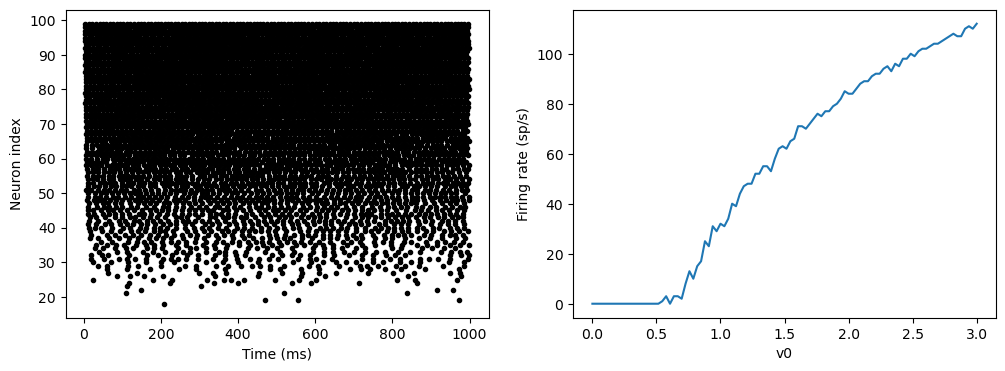

In [218]:
start_scope()

N = 100
tau = 10*ms
v0_max = 3.
duration = 1000*ms
sigma = 0.2

eqs = '''
dv/dt = (v0-v)/tau+sigma*xi*tau**-0.5 : 1 (unless refractory)
v0 : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='euler')
# M = StateMonitor(G, 'v', record=0)
M = SpikeMonitor(G)

G.v0 = 'i*v0_max/(N-1)'

run(duration)

figure(figsize=(12,4))
subplot(121)
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')
ylabel('Firing rate (sp/s)');

# That's the same figure as in the previous section but with some noise added. 
# Note how the curve has changed shape: instead of a sharp jump from firing at rate 0 to firing at a positive rate, 
# it now increases in a sigmoidal fashion. This is because no matter how small the driving force the 
# randomness may cause it to fire a spike.

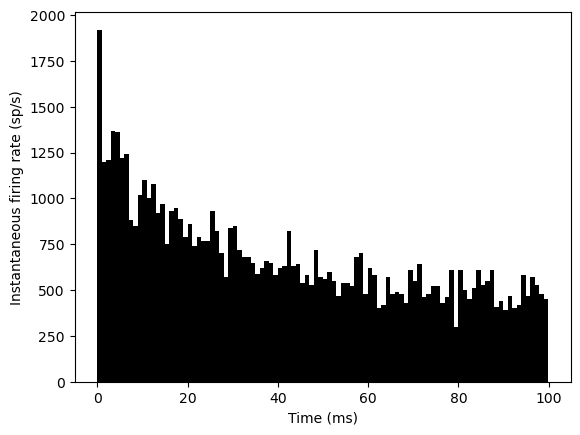

In [221]:
start_scope()

N = 1000
tau = 10*ms
vr = -70*mV
vt0 = -50*mV
delta_vt0 = 5*mV
tau_t = 100*ms
sigma = 0.5*(vt0-vr)
v_drive = 2*(vt0-vr)
duration = 100*ms

eqs = '''
dv/dt = (v_drive+vr-v)/tau + sigma*xi*tau**-0.5 : volt
dvt/dt = (vt0-vt)/tau_t : volt
'''

reset = '''
v = vr
vt += delta_vt0
'''

G = NeuronGroup(N, eqs, threshold='v>vt', reset=reset, refractory=5*ms, method='euler')
# M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G)

G.v = 'rand()*(vt0-vr)+vr'
G.vt = vt0

run(duration)

_ = hist(spikemon.t/ms, 100, histtype='stepfilled', facecolor='k', weights=list(ones(len(spikemon))/(N*defaultclock.dt)))
xlabel('Time (ms)')
ylabel('Instantaneous firing rate (sp/s)');